In [150]:
email = ''
password = ''
company_url = 'https://www.linkedin.com/company/snap-inc-co/'
img_name = 'snapchat.png'
entries = 100

In [12]:
!pip install selenium
!pip install wordcloud

In [42]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from wordcloud import WordCloud, STOPWORDS
from time import sleep
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [16]:
path = './chromedriver.exe'
driver = webdriver.Chrome(executable_path=path)
driver.get(url = 'https://www.linkedin.com/'); sleep(1)

In [17]:
sign_in = driver.find_element(by='link text', value='Sign in')
sign_in.click(); sleep(1)

In [18]:
def type_word(word, element):
    ''' Types a word letter-by-letter while waiting
        a random amount of time after each stroke'''
    for letter in word:
        sleep(random.uniform(.1, .4))
        element.send_keys(letter)

In [19]:
email_entry = driver.find_element(by='css selector', value='#username')
password_entry = driver.find_element(by='css selector', value='#password')
        
type_word(email, email_entry)
type_word(password, password_entry)

password_entry.send_keys(Keys.RETURN); sleep(3)

In [145]:
driver.get(url=company_url)

In [151]:
text_set = set()

for i in range(entries):
    css = '.occludable-update:nth-child({}) > div > div:nth-child(3)'.format(i)
    scroll = "window.scrollTo(0, {})".format(i * 500)
    try:
        ele = driver.find_element(by='css selector', value=css)
        driver.execute_script(scroll)
        text = ele.text.replace('hashtag', '')\
                       .replace('\n', '')\
                       .replace('…see more', '')\
                       .replace('#', '')
        text_set.add(text)
        sleep(.4)
    except: pass
    
s = ' '.join(text_set)

In [152]:
stopwords = set(STOPWORDS)
my_stopwords = {'see', 'help', 'will'}
stopwords = stopwords.union(my_stopwords)

cloud = WordCloud(
    background_color='white',
    max_words=50000,
    stopwords=stopwords
)

cloud.generate(s)

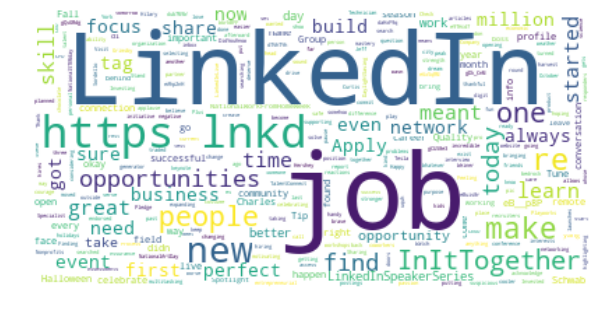

In [132]:
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(12) # set height
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

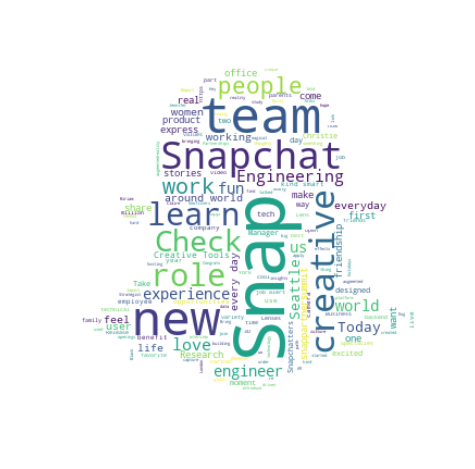

In [159]:
# change max_words, contour_width (outline), and colors to get desired look.

mask = np.array(Image.open(img_name))       
cloud = WordCloud(background_color='white', max_words=250, mask=mask,
                  stopwords=stopwords, contour_width=0, contour_color='lightgray')

cloud.generate(s)

fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(8) # set height

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()